In [200]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [108]:
#Read in the csv file and convert to a Pandas dataframe
happiness_2015 = pd.read_csv("Data_sets/2015.csv")
happiness_2016 = pd.read_csv("Data_sets/2016.csv")
happiness_2017 = pd.read_csv("Data_sets/2017.csv")
happiness_2018 = pd.read_csv("Data_sets/2018.csv")
happiness_2019 = pd.read_csv("Data_sets/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [12]:
# Quick look for The data
happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [14]:
happiness_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [16]:
happiness_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [18]:
happiness_2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [20]:
happiness_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [22]:
#  Shape of data

print(f"The Shape of data in 2015 is : {happiness_2015.shape}")
print(f"The Shape of data in 2016 is : {happiness_2016.shape}")
print(f"The Shape of data in 2017 is : {happiness_2017.shape}")
print(f"The Shape of data in 2018 is : {happiness_2018.shape}")
print(f"The Shape of data in 2019 is : {happiness_2019.shape}")

The Shape of data in 2015 is : (158, 12)
The Shape of data in 2016 is : (157, 13)
The Shape of data in 2017 is : (155, 12)
The Shape of data in 2018 is : (156, 9)
The Shape of data in 2019 is : (156, 9)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [25]:
# get more information about the data

happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [27]:
happiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [29]:
happiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [31]:
happiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [33]:
happiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [35]:
# Print some statisc 

happiness_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [37]:
happiness_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [39]:
happiness_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [41]:
happiness_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [43]:
happiness_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [43]:
# In the kaggle page mentioned They use data from the Gallup World Poll , 
# The scores are based on answers to the main life evaluation question asked in the poll.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [46]:
# Is not because it almost 6 years before but our usecase wants the years between 2015-2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [49]:
# Yes 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [111]:
# Delete The Region column because we will not use it in answering our Qusions and keep only the factors that afect the Happiness Score 
happiness_2015.drop(["Region","Standard Error","Dystopia Residual"],axis=1,inplace=True)
happiness_2016.drop(["Region","Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual"],axis=1,inplace=True)
happiness_2017.drop(["Whisker.high","Whisker.low","Dystopia.Residual"],axis=1,inplace=True)

In [47]:
happiness_2015.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [49]:
happiness_2016.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083


In [51]:
happiness_2017.tail(2)

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565


In [113]:
# concat 2015,2016 and 2017 togther

# first let change 2017 names
happiness_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom','Generosity','Trust (Government Corruption)']

In [115]:
# create a new columns called year
happiness_2015["year"] = 2015
happiness_2016["year"] = 2016
happiness_2017["year"] = 2017

In [117]:
# concat
happiness_1 = pd.concat([happiness_2015,happiness_2016,happiness_2017],ignore_index=True)
happiness_1

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,2017
466,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,2017
467,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,2017
468,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,2017


In [121]:
#rename the columns 
happiness_1.columns = ["Country or region","Overall rank","Score",
                       "GDP per capita","Social support","Healthy life expectancy",
                       "Freedom to make life choices","Perceptions of corruption",
                        "Generosity","year"]

In [123]:
happiness_1.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [125]:
happiness_2018["year"] = 2018
happiness_2019["year"] = 2019

In [127]:
happiness_2 = pd.concat([happiness_2018,happiness_2019],ignore_index=True)
happiness_2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
308,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
309,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
310,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [131]:
happiness_2 = happiness_2[["Country or region","Overall rank","Score",
                       "GDP per capita","Social support","Healthy life expectancy",
                       "Freedom to make life choices","Perceptions of corruption",
                        "Generosity","year"]]

In [133]:
happiness_2

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018
...,...,...,...,...,...,...,...,...,...,...
307,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
308,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
309,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
310,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019


In [135]:
happiness = pd.concat([happiness_1,happiness_2],ignore_index=True)
happiness

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [137]:
# Total of dupliucated rows
print(happiness.duplicated().sum())

0


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [140]:
#Display number missing values per column
happiness.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
year                            0
dtype: int64

In [142]:
happiness[happiness["Perceptions of corruption"].isnull()]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
489,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [144]:
happiness.loc[happiness["Country or region"] == "United Arab Emirates"]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2015
185,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2016
335,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,2017
489,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,2018
646,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,2019


In [82]:
# go to clean the data

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [146]:
# check columns types 
happiness.dtypes

Country or region                object
Overall rank                      int64
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Perceptions of corruption       float64
Generosity                      float64
year                              int64
dtype: object

In [ ]:
# all our columns are accrate 

In [87]:
# go to clean them 

In [148]:
# check outliers 
happiness.head(2)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [178]:
# here we will take the year 2019  for Perceptions of corruption and put as 2018 Backward Filling 
# --> because the rank of UAE dont change a lot 20 -> 21
uae_2019 = happiness[happiness["Country or region"] == "United Arab Emirates"].values[-1][-3]
happiness.fillna(uae_2019,inplace=True)

In [180]:
happiness.loc[happiness["Country or region"] == "United Arab Emirates"]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
19,United Arab Emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2015
185,United Arab Emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2016
335,United Arab Emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,2017
489,United Arab Emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,0.18200,0.186000,2018
646,United Arab Emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,2019


In [184]:
happiness.isnull().sum().sort_values(ascending = False)

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
year                            0
dtype: int64

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [194]:
group_year =  happiness.groupby("year")
top10 = group_year.head(10)
top10

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
5,Finland,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2015
6,Netherlands,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2015
7,Sweden,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2015
8,New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2015
9,Australia,10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2015


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [196]:
# count contry that appers in top 10 in the 5 years 
counts_country = top10["Country or region"].value_counts()
counts_country

Country or region
Switzerland    5
Iceland        5
Denmark        5
Norway         5
Canada         5
Finland        5
Netherlands    5
Sweden         5
New Zealand    5
Australia      4
Austria        1
Name: count, dtype: int64

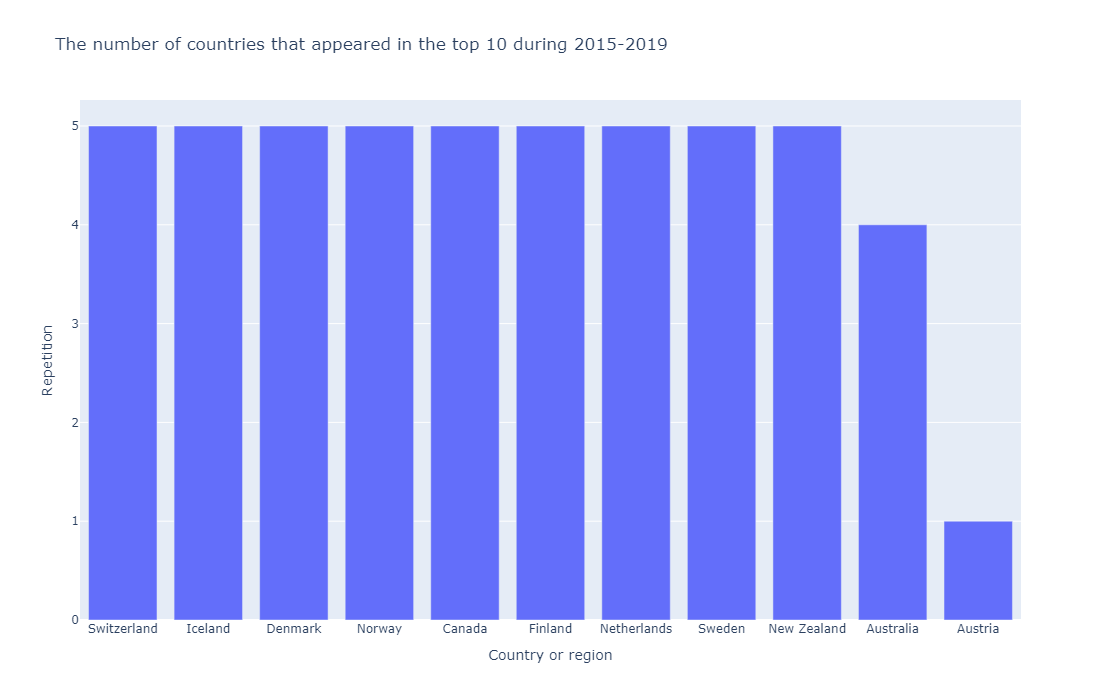

In [216]:
fig = px.bar(counts_country,x=counts_country.index,y=counts_country.values,
            width=1000,height=700,title="The number of countries that appeared in the top 10 during 2015-2019")
fig.update_layout(
    yaxis_title="Repetition")
fig.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

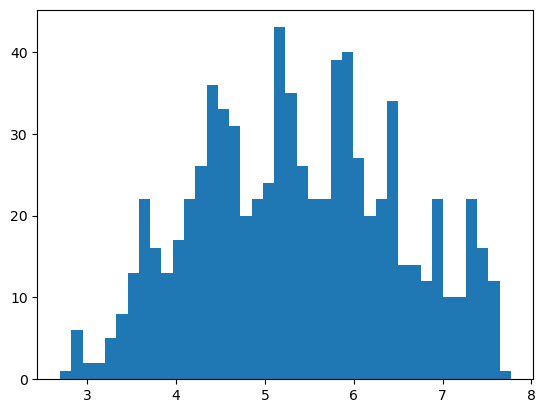

In [228]:
plt.hist(happiness["Score"],
        bins=40)
plt.show()

In [230]:
happiness.head(2)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015


Text(0.5, 1.0, 'Histogram for Generosity')

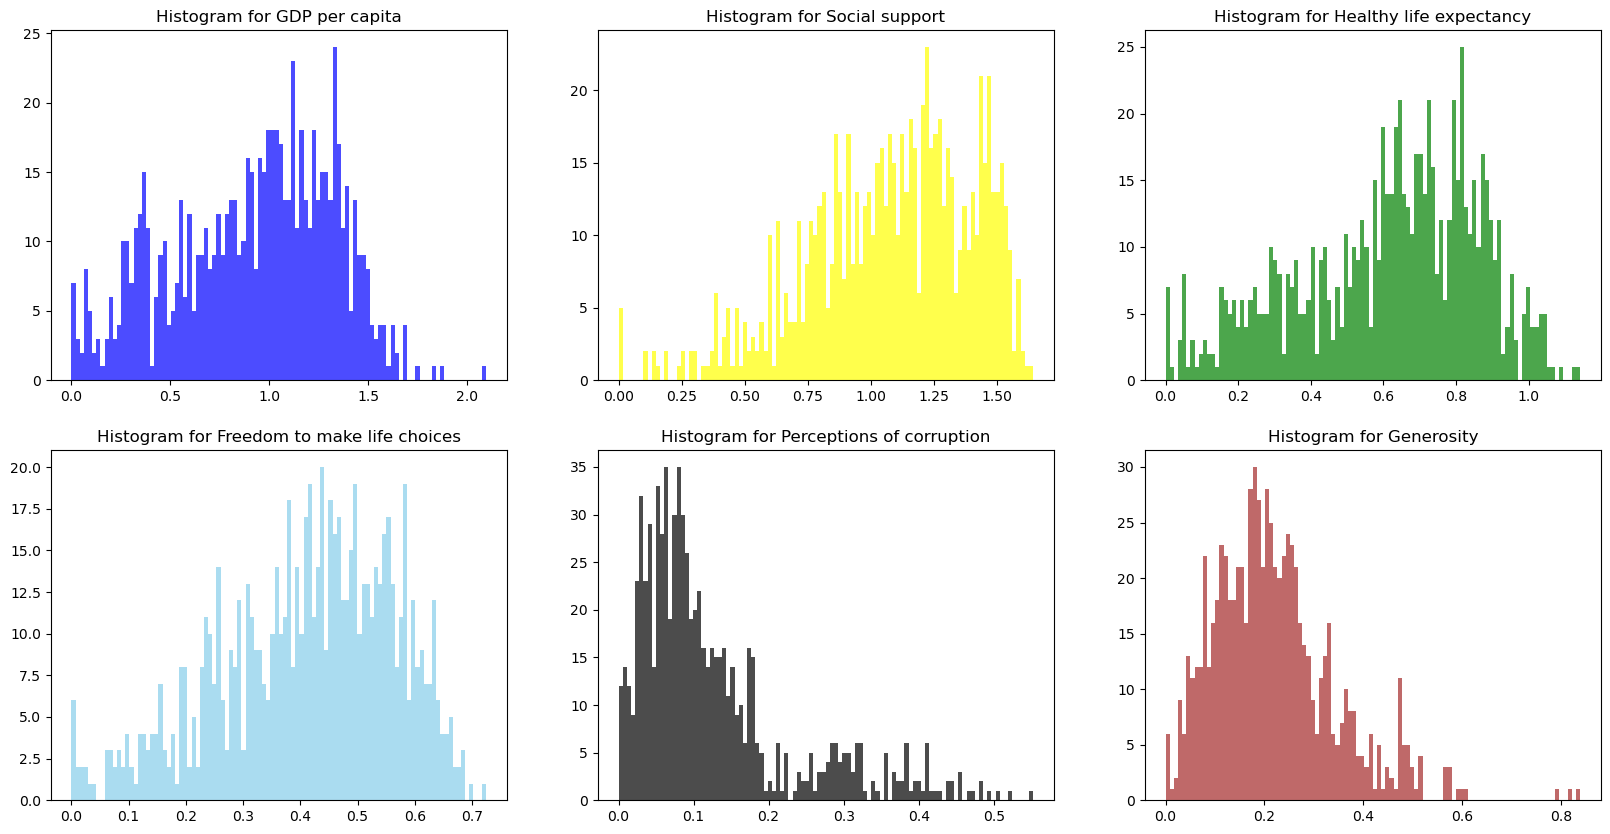

In [276]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes[0][0].hist(happiness['GDP per capita'], bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for GDP per capita')

axes[0][1].hist(happiness['Social support'], bins=100, alpha=0.7, color='yellow')
axes[0][1].set_title('Histogram for Social support')

axes[0][2].hist(happiness['Healthy life expectancy'], bins=100, alpha=0.7, color='green')
axes[0][2].set_title('Histogram for Healthy life expectancy')

axes[1][0].hist(happiness['Freedom to make life choices'], bins=100, alpha=0.7, color='skyblue')
axes[1][0].set_title('Histogram for Freedom to make life choices')

axes[1][1].hist(happiness['Perceptions of corruption'], bins=100, alpha=0.7, color='black')
axes[1][1].set_title('Histogram for Perceptions of corruption')

axes[1][2].hist(happiness['Generosity'] ,bins=100, alpha=0.7, color='brown')
axes[1][2].set_title('Histogram for Generosity')

<Axes: ylabel='Score'>

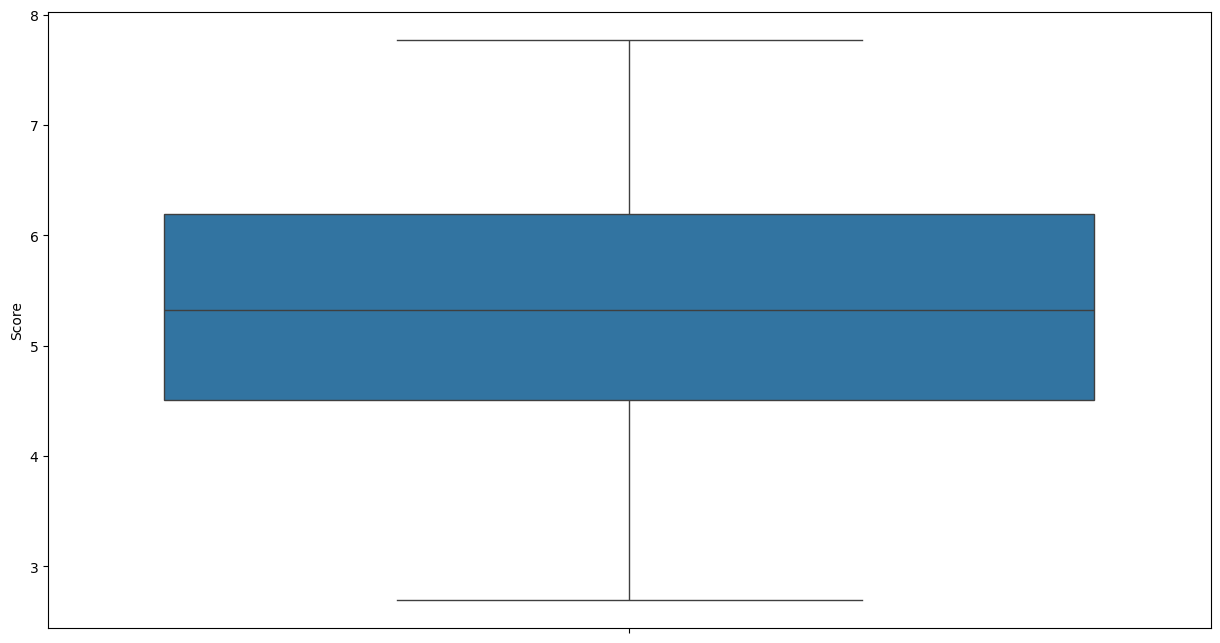

In [226]:
plt.figure(figsize=(15,8))
sns.boxplot(
    happiness,
    y="Score"
)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [246]:
happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
GDP per capita,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Social support,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Healthy life expectancy,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom to make life choices,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Perceptions of corruption,782.0,0.125508,0.105768,0.000,0.054250,0.091033,0.156243,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075
year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

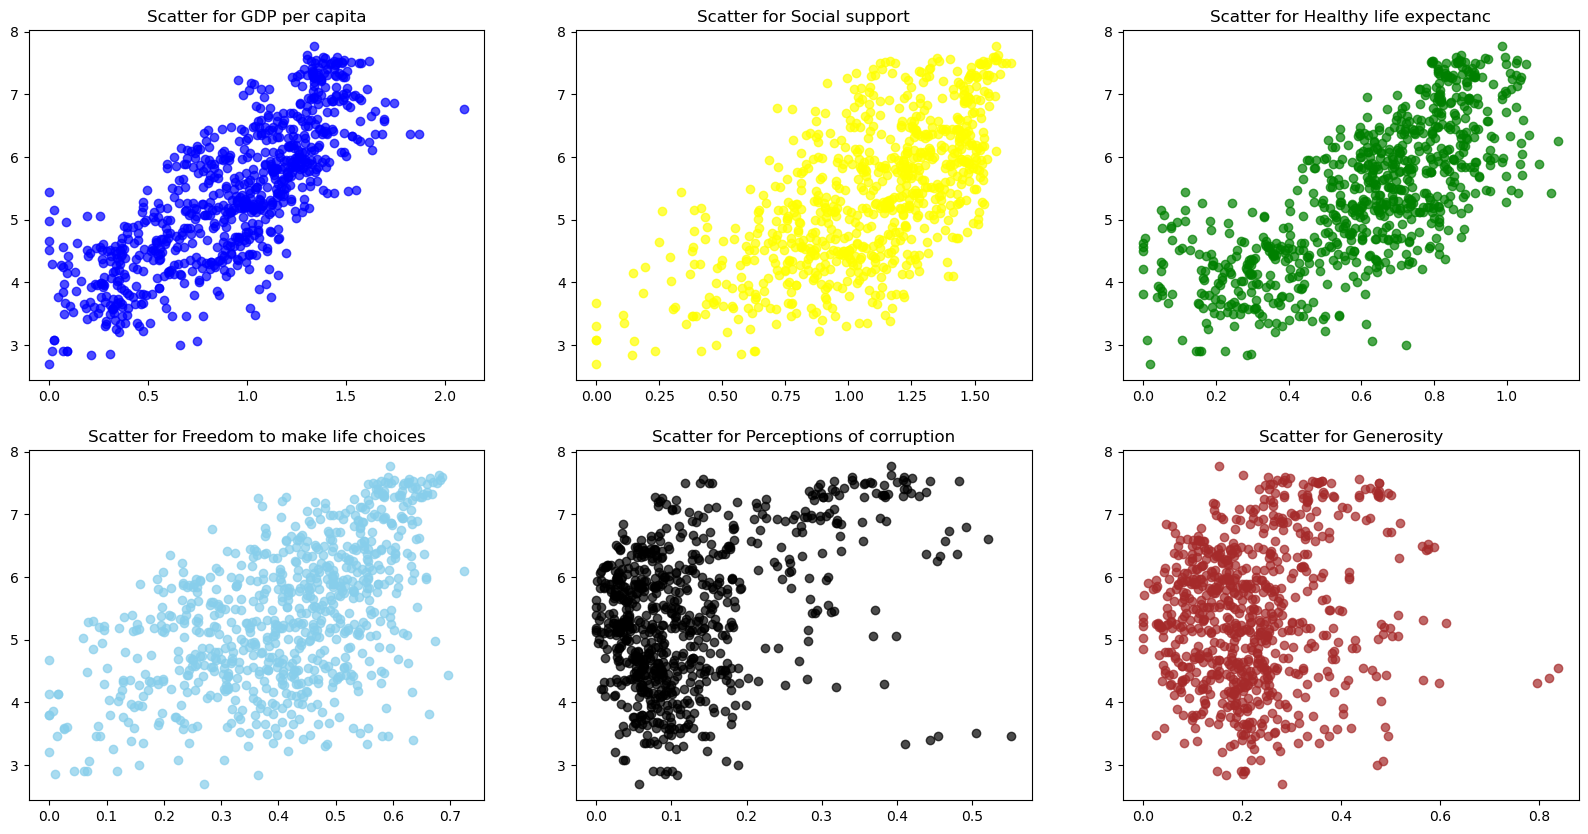

In [284]:
#See the relaition between the Score and Six factors
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes[0][0].scatter(y='Score', x='GDP per capita',data=happiness,alpha=0.7, color='blue')
axes[0][0].set_title('Scatter for GDP per capita')

axes[0][1].scatter(y='Score', x='Social support',data=happiness, alpha=0.7, color='yellow')
axes[0][1].set_title('Scatter for Social support')

axes[0][2].scatter(y='Score', x='Healthy life expectancy',data=happiness, alpha=0.7, color='green')
axes[0][2].set_title('Scatter for Healthy life expectanc')

axes[1][0].scatter(y='Score', x='Freedom to make life choices', data=happiness,alpha=0.7, color='skyblue')
axes[1][0].set_title('Scatter for Freedom to make life choices')

axes[1][1].scatter(y='Score', x='Perceptions of corruption', data=happiness,  alpha=0.7, color='black')
axes[1][1].set_title('Scatter for Perceptions of corruption')

axes[1][2].scatter(y='Score', x='Generosity', data=happiness,alpha=0.7, color='brown')
axes[1][2].set_title('Scatter for Generosity')
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [286]:
corr_matrix = happiness.select_dtypes(include=np.number).corr()
corr_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
Overall rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.373199,-0.117713,-0.007768
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.398801,0.137578,0.007065
GDP per capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.306583,-0.014560,0.019768
Social support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.125682,-0.037262,0.367431
Healthy life expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250616,0.010638,0.130302
Freedom to make life choices,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.458736,0.290706,0.010353
Perceptions of corruption,-0.373199,0.398801,0.306583,0.125682,0.250616,0.458736,1.000000,0.318664,-0.121716
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318664,1.000000,-0.192587
year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,-0.121716,-0.192587,1.000000


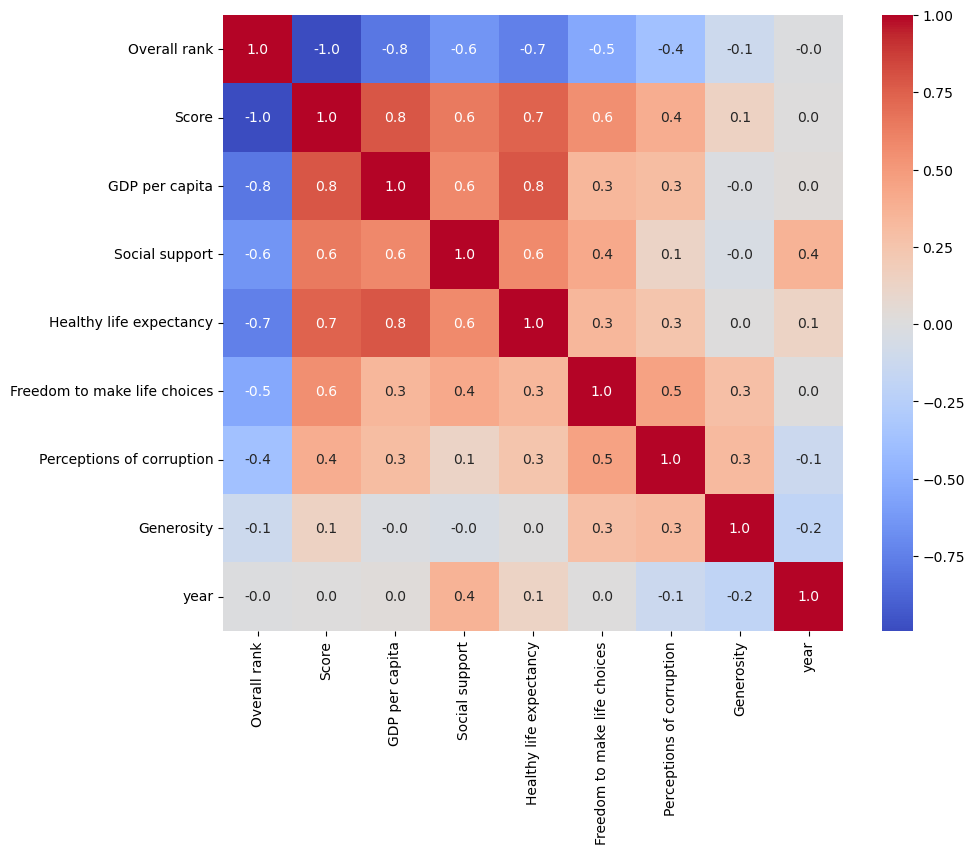

In [288]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )
plt.show()

In [ ]:
# as we see the GDP have the most impact in score happines

# Q1

In [ ]:
# there are six factors contributing to happiness which are : GDP per capita,Social support,Healthy life expectancy	Freedom to make life choices,
# ,Perceptions of corruption and Generosity

In [294]:
# 2015
group_year.get_group(2015).head(10)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [296]:
group_year.get_group(2016).head(10)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
158,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
159,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
160,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
161,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
162,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016
163,Canada,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2016
164,Netherlands,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2016
165,New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2016
166,Australia,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2016
167,Sweden,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2016


In [298]:
group_year.get_group(2017).head(10)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
315,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
316,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2017
317,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2017
318,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2017
319,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2017
320,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.282662,0.470490,2017
321,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2017
322,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2017
323,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.384399,0.385399,2017
324,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2017


In [300]:
group_year.get_group(2018).head(10)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
470,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
471,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
472,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
473,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
474,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018
475,Netherlands,6,7.441,1.361,1.488,0.878,0.638,0.295,0.333,2018
476,Canada,7,7.328,1.330,1.532,0.896,0.653,0.291,0.321,2018
477,New Zealand,8,7.324,1.268,1.601,0.876,0.669,0.389,0.365,2018
478,Sweden,9,7.314,1.355,1.501,0.913,0.659,0.383,0.285,2018
479,Australia,10,7.272,1.340,1.573,0.910,0.647,0.302,0.361,2018


In [310]:
group_year.get_group(2019).head(10)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
626,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
627,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
628,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
629,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
630,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019
631,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,2019
632,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267,2019
633,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,2019
634,Canada,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,2019
635,Austria,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,2019


# Q2

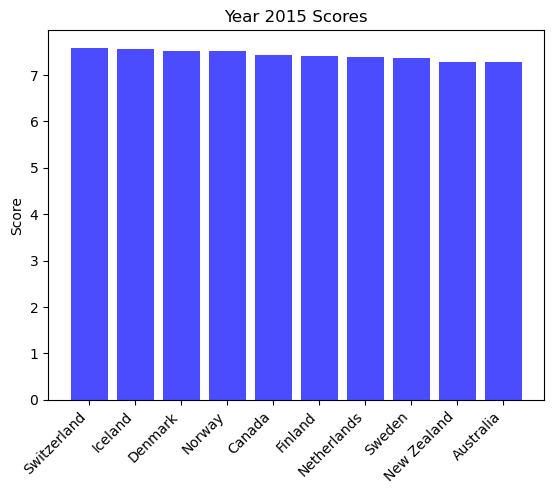

In [330]:
plt.bar(height=group_year["Score"].get_group(2015).head(10), 
            x=group_year["Country or region"].get_group(2015).head(10),
            alpha=0.7, color='blue')
plt.title("Year 2015 Scores")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.show()

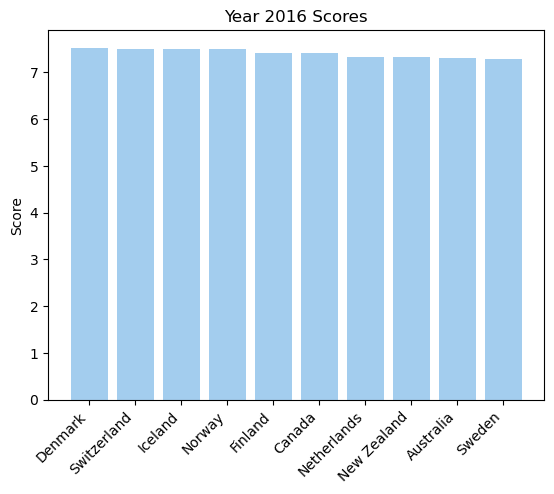

In [342]:
plt.bar(height=group_year["Score"].get_group(2016).head(10), 
            x=group_year["Country or region"].get_group(2016).head(10),
            alpha=0.7, color='#7CB9E8')
plt.title("Year 2016 Scores")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.show()

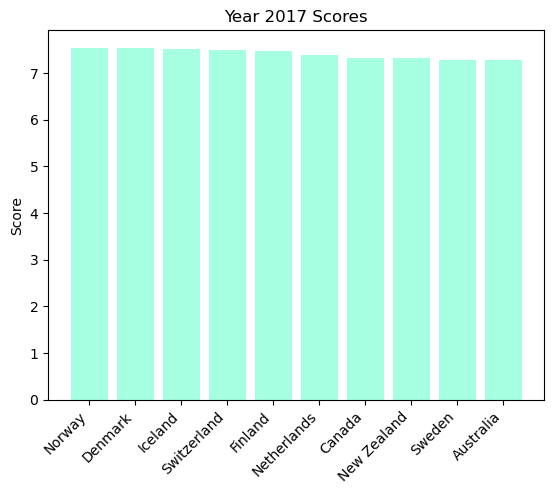

In [340]:
plt.bar(height=group_year["Score"].get_group(2017).head(10), 
            x=group_year["Country or region"].get_group(2017).head(10),
            alpha=0.7, color='#7FFFD4')
plt.title("Year 2017 Scores")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.show()

## as we see there is not big difference Bettween This year in score , There are some changes in ranking postion 2016-2017 like Nowray
## 4 --> 1
## in 2015-2016 Not the big difference

## Q3

In [557]:
# take a copy of the data frame and show the diffrence bettwen ranks in different years
happiens_change = happiness.copy()
happiens_change["Overall rank Change"] = happiness.groupby("Country or region")['Overall rank'].diff()
happiens_change.tail(2)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year,Overall rank Change
780,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019,0.0
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019,2.0


In [563]:
# show country that have significant increase by overall rank
significant_increase = happiens_change[happiens_change['Overall rank Change'] < -20]
increase_countries = significant_increase['Country or region'].unique()
filtered_increase = happiness[happiness['Country or region'].isin(increase_countries)]
filtered_increase['Country or region'].unique()

array(['Algeria', 'Latvia', 'Ghana', 'Bulgaria', 'Guinea', 'Ivory Coast',
       'Benin'], dtype=object)

In [565]:
# show country that have significant decrease by overall rank
significant_decrease = happiens_change[happiens_change['Overall rank Change'] > 20]
decrease_countries = significant_decrease['Country or region'].unique()
filtered_decrease = happiness[happiness['Country or region'].isin(decrease_countries)]
filtered_decrease['Country or region'].unique()

array(['Venezuela', 'Malaysia', 'Algeria', 'Vietnam', 'Nigeria', 'Zambia',
       'Lesotho', 'Swaziland', 'Liberia'], dtype=object)

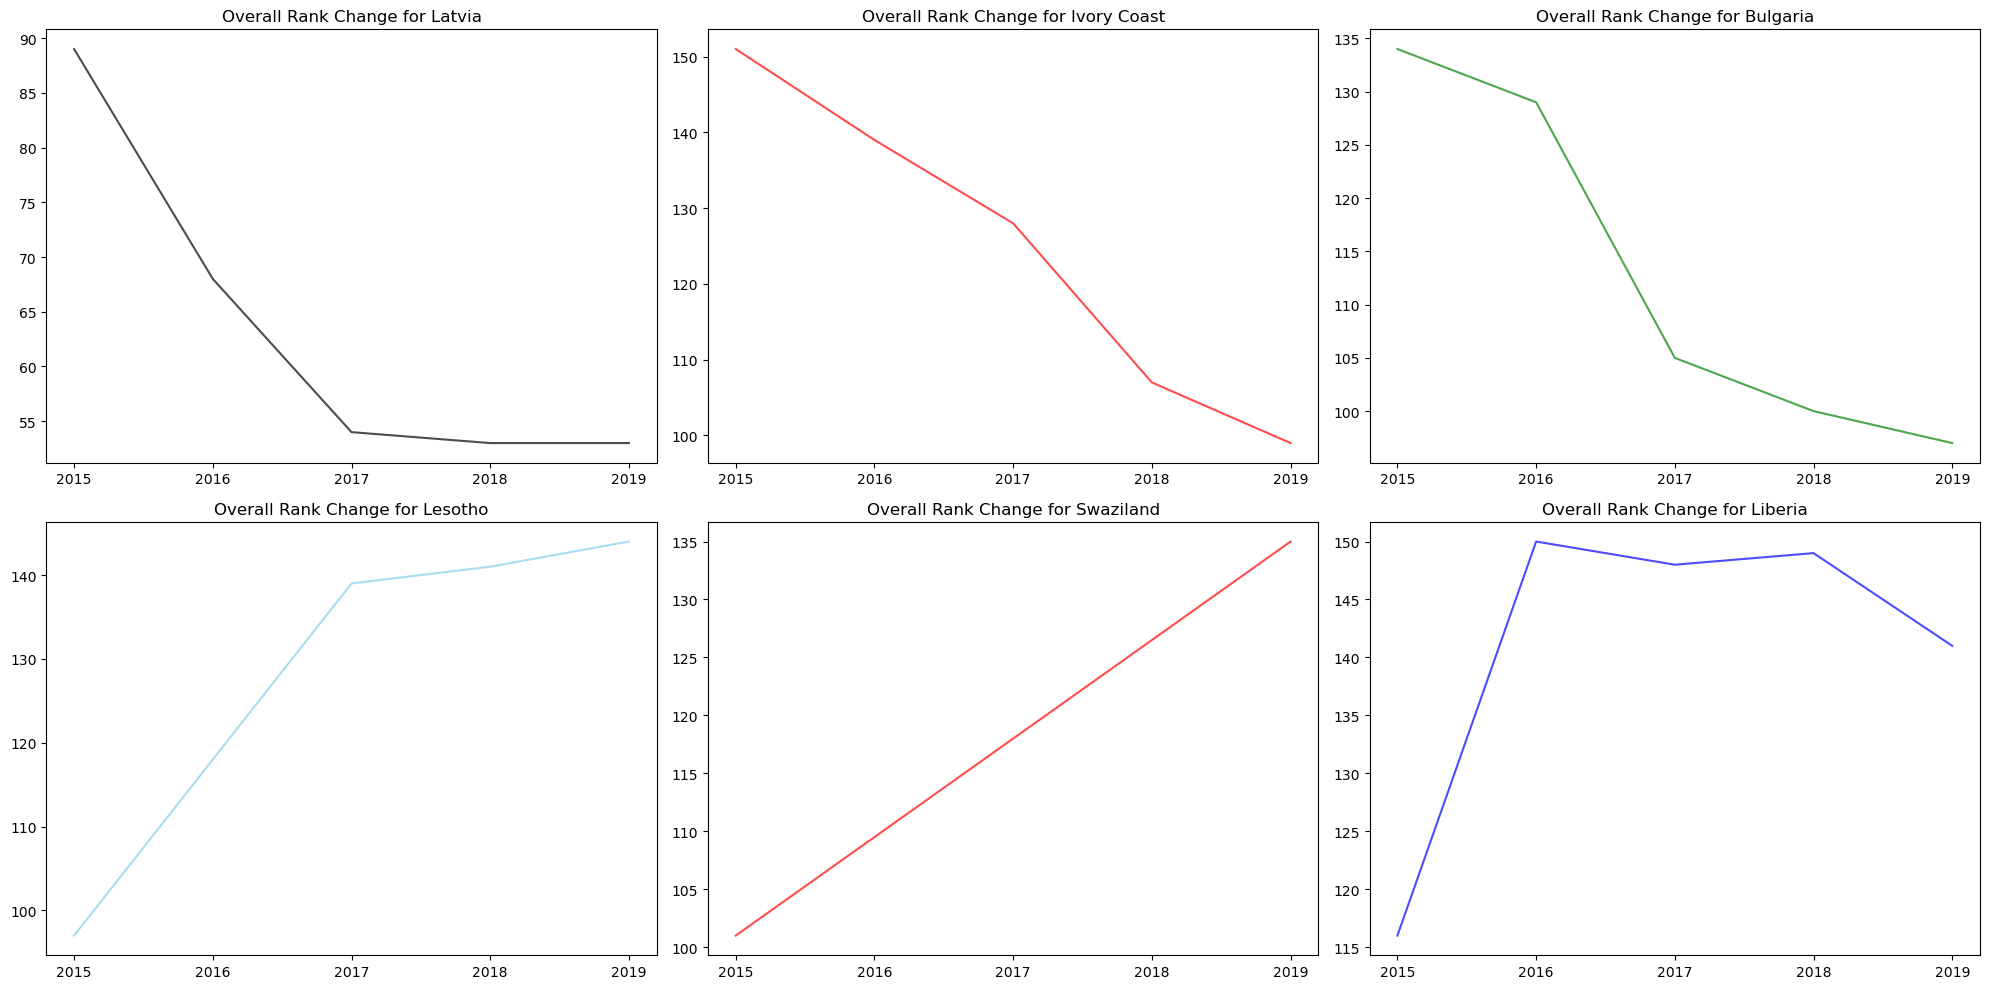

In [567]:
#See 6 country that have  increase or decrease in overall rank in happiness

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

years = happiness['year'].unique()
# Latvia plot
axes[0][0].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Latvia"], alpha=0.7, color='black')
axes[0][0].set_title('Overall Rank Change for Latvia')
axes[0][0].set_xticks(years)
# Ivory Coast plot
axes[0][1].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Ivory Coast"], alpha=0.7, color='red')
axes[0][1].set_title('Overall Rank Change for Ivory Coast')
axes[0][1].set_xticks(years)

# Bulgaria plot
axes[0][2].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Bulgaria"], alpha=0.7, color='green')
axes[0][2].set_title('Overall Rank Change for Bulgaria')
axes[0][2].set_xticks(years)

# Lesotho plot
axes[1][0].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Lesotho"], alpha=0.7, color='skyblue')
axes[1][0].set_title('Overall Rank Change for Lesotho')
axes[1][0].set_xticks(years)

# Swaziland plot
axes[1][1].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Swaziland"], alpha=0.7, color='red')
axes[1][1].set_title('Overall Rank Change for Swaziland')
axes[1][1].set_xticks(years)

# Liberia plot
axes[1][2].plot('year', 'Overall rank', data=happiness[happiness["Country or region"] == "Liberia"], alpha=0.7, color='blue')
axes[1][2].set_title('Overall Rank Change for Liberia')
axes[1][2].set_xticks(years)

# Adjust layout
plt.tight_layout()
plt.show()

## Q4 What are saudi arabia ranks in this years 2015-2019

In [576]:
happiness[happiness["Country or region"] == "Saudi Arabia"]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,year
34,Saudi Arabia,35,6.411,1.395410,1.083930,0.720250,0.310480,0.325240,0.137060,2015
191,Saudi Arabia,34,6.379,1.489530,0.848290,0.592670,0.379040,0.300080,0.154570,2016
351,Saudi Arabia,37,6.344,1.530624,1.286678,0.590148,0.449751,0.273432,0.147616,2017
502,Saudi Arabia,33,6.371,1.379000,1.331000,0.633000,0.509000,0.127000,0.098000,2018
653,Saudi Arabia,28,6.375,1.403000,1.357000,0.795000,0.439000,0.132000,0.080000,2019
